In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jiaweihong2032/periodontal-data-for-testing")

print("Path to dataset files:", path)

/Users/franciscoteixeirabarbosa/.pyenv/versions/3.11.7/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 1.43G/1.43G [02:26<00:00, 10.5MB/s]

Extracting files...


Path to dataset files: /Users/franciscoteixeirabarbosa/.cache/kagglehub/datasets/jiaweihong2032/periodontal-data-for-testing/versions/1


Available categories: ['OHG-testing', 'PFI-testing', 'MGI-testing']
(2784, 1856)
RGB
JPEG


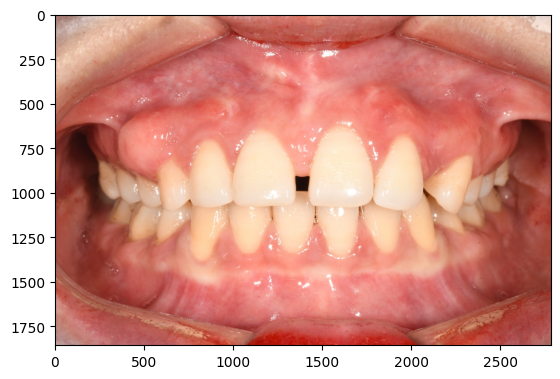

In [3]:
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import os

# Let's explore the dataset structure
# 3 categories: "Modified Gingival Index", "Oral Hygiene Index", "Plaque Formation Index"
dataset_path = "datasets/images"
print("Available categories:", os.listdir(dataset_path))

# Let's look at one image from each category
# (You'll need to figure out how to load and display them)
image_path = "datasets/images/MGI-testing/MGI/0a2c56c9-44c9-4a22-a2af-fc3179b00fec.jpg"
image = Image.open(image_path)

# Checking properties
print(image.size)
print(image.mode)
print(image.format)

plt.imshow(image)
plt.show()

MGI Folder: ['DSC_2223.jpg', '5354d0fa-76c1-4086-ac14-8201f62fb4ef.jpg', 'AAA_7630.jpg', 'DSC_1272.jpg', 'AAA_0942.jpg', 'DSC_9941.jpg', 'DSC_0024.jpg', 'abef0cbd-0f96-401f-9eb0-64949a4a2eda.jpg', 'DSC_5160.jpg', 'DSC_3920.jpg', 'AAA_1876.jpg', 'DSC_3908.jpg', 'DSC_2425.jpg', 'AAA_6894.jpg', 'DSC_1110.jpg', 'AAA_6116.jpg', 'DSC_2418.jpg', 'DSC_5439.jpg', 'DSC_0227.jpg', 'DSC_1688.jpg', '66e5b168-5b12-4b5e-8e41-b253f5e45e78.jpg', 'DSC_0025.jpg', '133AD750DSC_1887.jpg', 'DSC_0031.jpg', 'DSC_2815.jpg', 'IMG_1914.jpg', 'DSC_0780.jpg', 'DSC_1515.jpg', 'DSC_2020.jpg', 'DSC_2034.jpg', 'DSC_0435.jpg', '14bd12bf-2834-440d-9caf-4f66ec2b6672.jpg', 'DSC_2236.jpg', '565fc3aa-9e20-45bd-9c84-bb05f022c3ec.jpg', '96af5a07-b04b-4836-81bc-a24ff21709df.jpg', 'DSC_0190.jpg', 'DSC_2963.jpg', '79ae080f-aa18-4e55-8a80-f990a3f29d02.jpg', 'AAA_3333.jpg', 'DSC_9981.jpg', '134AD750DSC_3859.jpg', '00e8e7c1-6731-4d42-ba75-7177171e3416.jpg', '478f5d2c-eaff-488e-a8c2-c562014280d1.jpg', '3b929342-8a1d-4f0c-b5cc-138548

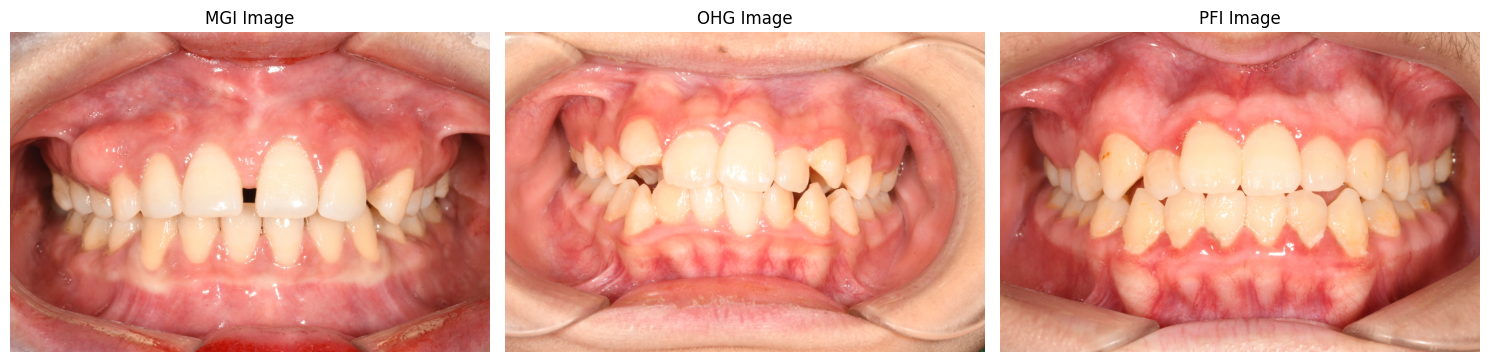

MGI images: 383
OHG images: 619
PFI images: 374


In [11]:
# Finding exact filename
# For each folder
mgi_folder = "datasets/images/MGI-testing/MGI"
ohg_folder = "datasets/images/OHG-testing/OHG"
pfi_folder = "datasets/images/PFI-testing/PFI"
print("MGI Folder:", os.listdir(mgi_folder))
print("OHG Folder:", os.listdir(ohg_folder))
print("PFI Folder:", os.listdir(pfi_folder))

mgi_image = "datasets/images/MGI-testing/MGI/0a2c56c9-44c9-4a22-a2af-fc3179b00fec.jpg"
ohg_image = "datasets/images/OHG-testing/OHG/3-18DDSC_8979.JPG"
pfi_image = "datasets/images/PFI-testing/PFI/0bc52c0d-f515-44f1-861a-1097bacc542.jpg"

image_1 = Image.open(mgi_image)
image_2 = Image.open(ohg_image)
image_3 = Image.open(pfi_image)

print("For MGI image, Image size:", image_1.size, "Image Mode:", image_1.mode, "Image format:", image_1.format)
print("For OHG image, Image size:", image_2.size, "Image Mode:", image_2.mode, "Image format:", image_2.format)
print("For PFI image, Image size:", image_3.size, "Image Mode:", image_3.mode, "Image format:", image_3.format)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image_1)
axes[0].set_title("MGI Image")
axes[0].axis('off')

axes[1].imshow(image_2)
axes[1].set_title("OHG Image")
axes[1].axis('off')

axes[2].imshow(image_3)
axes[2].set_title("PFI Image")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Count total images in each category
print(f"MGI images: {len(os.listdir(mgi_folder))}")
print(f"OHG images: {len(os.listdir(ohg_folder))}")
print(f"PFI images: {len(os.listdir(pfi_folder))}")

In [12]:
# Dataset analysis
mgi_count = len(os.listdir(mgi_folder))
ohg_count = len(os.listdir(ohg_folder))
pfi_count = len(os.listdir(pfi_folder))

print(f"MGI (Modified Gingival Index): {mgi_count} images")
print(f"OHG (Oral Hygiene Index): {ohg_count} images")
print(f"PFI (Plaque Formation Index): {pfi_count} images")
print(f"Total: {mgi_count + ohg_count + pfi_count} images")

# Check for class imbalance
print(f"\nClass distribution:")
print(f"MGI: {mgi_count/(mgi_count + ohg_count + pfi_count)*100:.1f}%")
print(f"OHG: {ohg_count/(mgi_count + ohg_count + pfi_count)*100:.1f}%")
print(f"PFI: {pfi_count/(mgi_count + ohg_count + pfi_count)*100:.1f}%")

MGI (Modified Gingival Index): 383 images
OHG (Oral Hygiene Index): 619 images
PFI (Plaque Formation Index): 374 images
Total: 1376 images

Class distribution:
MGI: 27.8%
OHG: 45.0%
PFI: 27.2%


In [26]:
from torch.utils.data import Dataset
import torch
import numpy as np

class PeriodontalDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        self._build_simple_dataset()
        
        # Your task: Fill these lists with image paths and labels
        # Hint: Loop through each category folder
    def _build_simple_dataset(self):

        categories = {
        'MGI-testing': 0,
        'OHG-testing': 1,
        'PFI-testing': 2
    }
        
        for category, label in categories.items():
            category_path = os.path.join(self.root_dir, category)

            subfolder = category.split("-")[0]
            print(f"Category: {category} -> Subfolder: {subfolder}")
        
            category_path = os.path.join(self.root_dir, category)
            images_path = os.path.join(category_path, subfolder)
            
            print(f"Looking in: {images_path}")
            print(f"Path exists: {os.path.exists(images_path)}")
            
            if os.path.exists(images_path):
                files = os.listdir(images_path)
                print(f"Found {len(files)} files in {subfolder}")
        
            images_path = os.path.join(category_path, subfolder)
            print(f"Category: {category} -> Subfolder: {subfolder}")

            for image_file in os.listdir(images_path):
                image_path = os.path.join(images_path, image_file)
                self.image_paths.append(image_path)
                self.labels.append(label)

            print(f"Added {len(os.listdir(images_path))} {category} images")

        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        # Your task: Load image, apply transforms, return (image, label)
        pass

# Test your extended dataset
dataset = PeriodontalDataset("datasets/images")
print(f"Total dataset size: {len(dataset)}")
print(f"Label distribution: {np.bincount(dataset.labels)}")

Category: MGI-testing -> Subfolder: MGI
Looking in: datasets/images/MGI-testing/MGI
Path exists: True
Found 383 files in MGI
Category: MGI-testing -> Subfolder: MGI
Added 383 MGI-testing images
Category: OHG-testing -> Subfolder: OHG
Looking in: datasets/images/OHG-testing/OHG
Path exists: True
Found 619 files in OHG
Category: OHG-testing -> Subfolder: OHG
Added 619 OHG-testing images
Category: PFI-testing -> Subfolder: PFI
Looking in: datasets/images/PFI-testing/PFI
Path exists: True
Found 374 files in PFI
Category: PFI-testing -> Subfolder: PFI
Added 374 PFI-testing images
Total dataset size: 1376
Label distribution: [383 619 374]
